# 主成分分析 (2)

In [1]:
!pip install japanize-matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

2次元のデータの例で主成分分析の基本的な考え方を掴んだところで、多次元のデータに対する主成分分析を考えよう。

## データの表現

$d$次元のベクトル$\pmb{x} \in \mathbb{R}^d$からなる事例を$N$件集めたデータを行列$\pmb{X} \in \mathbb{R}^{N \times d}$で表す。

<a id="f13-1"></a>
(13.1)  
\begin{align}
\pmb{X} = \begin{pmatrix}\pmb{x}_1^\top \\ \pmb{x}_2^\top \\ \dots \\ \pmb{x}_N^\top \end{pmatrix}
\end{align}

また、データの平均ベクトル$\pmb{\bar{x}} \in \mathbb{R}^d$を次式で定義する。

<a id="f13-2"></a>
(13.2)  
\begin{align}
\pmb{\bar{x}} = \frac{1}{N} \sum_{i=1}^N \pmb{x}_i
\end{align}

### 射影したデータの分散

あるベクトル$\pmb{u} \in \mathbb{R}^d$でデータ点を射影したとき、$\pmb{u}$上に射影された点の分散$J$は、

<a id="f13-3"></a>
(13.3)  
$$
\begin{align}
J &= \frac{1}{N} \sum_{i=1}^N \left(\pmb{u}^\top \pmb{x}_i - \pmb{u}^\top \pmb{\bar{x}}\right)^2 \\
&= \frac{1}{N} \sum_{i=1}^N \left\{\pmb{u}^\top (\pmb{x}_i - \pmb{\bar{x}})\right\}^2 \\
&= \frac{1}{N} \sum_{i=1}^N \left\{\pmb{u}^\top (\pmb{x}_i - \pmb{\bar{x}})\right\} \cdot \left\{\pmb{u}^\top (\pmb{x}_i - \pmb{\bar{x}})\right\} \\
&= \frac{1}{N} \sum_{i=1}^N \left\{\pmb{u}^\top (\pmb{x}_i - \pmb{\bar{x}})\right\} \cdot \left\{(\pmb{x}_i - \pmb{\bar{x}})^\top \pmb{u}\right\} \\
&= \pmb{u}^\top \left[\frac{1}{N} \sum_{i=1}^N (\pmb{x}_i - \pmb{\bar{x}})(\pmb{x}_i - \pmb{\bar{x}})^\top\right] \pmb{u} \\
&= \pmb{u}^\top \pmb{S} \pmb{u}
\end{align}
$$


---

#### 【補足】データの中心化  

主成分分析の説明の中には、データ点が中心化されている（データ点の平均が原点にある）ことを仮定するものがある。前章の例で用いたデータ点も中心化されていた。しかし、式[(13.3)](#f13-3) の定式化では、射影後の分散を求めるときに分散共分散行列を経由する（各データ点から平均を引く）ことになるため、事前にデータ点を中心化しておかなくてもよい。


---

#### 【ポイント】射影後の点の分散

$N$個のデータ点$\pmb{x}_1, \dots, \pmb{x}_N \in \mathbb{R}^d$をベクトル$\pmb{u} \in \mathbb{R}^d$で射影したとき、$\pmb{u}$上に射影された点の分散は、

<a id="f13-4"></a>
(13.4)  
$$
\begin{align}
\pmb{u}^\top \pmb{S} \pmb{u}
\end{align}
$$

ここで、$\pmb{S} \in \mathbb{R}^{d \times d}$はデータの分散共分散行列である。

<a id="f13-5"></a>
(13.5)  
$$
\begin{align}
\pmb{S} &= \frac{1}{N} \sum_{i=1}^N (\pmb{x}_i - \pmb{\bar{x}}) (\pmb{x}_i - \pmb{\bar{x}})^\top \\
\end{align}
$$


---

#### 【補足】二次形式

式[(13.4)](#f13-4) は二次形式と呼ばれる。二次形式とは、二次の項のみで構成される多項式である。

例えば、

\begin{align*}
\pmb{S} = \begin{pmatrix}
1 & 1 \\
1 & 3
\end{pmatrix}
\end{align*}

を考えると、

\begin{align*}
\pmb{u}^\top\pmb{S}\pmb{u}
&=
\begin{pmatrix}
u_1 & u_2
\end{pmatrix}
\begin{pmatrix}
1 & 1 \\
1 & 3
\end{pmatrix}
\begin{pmatrix}
u_1 \\
u_2
\end{pmatrix} \\
&= \begin{pmatrix}
u_1 + u_2 & u_1 + 3u_2
\end{pmatrix}
\begin{pmatrix}
u_1 \\
u_2
\end{pmatrix} \\
&= u_1^2 + 2 u_1 u_2 + 3u_2^2
\end{align*}

となる。これは、$u_1$と$u_2$の二次の項のみを含む多項式であることが確認できる。


---

なお、分散共分散行列$\pmb{S}$の各要素$S_{a,b}$は、行列$\pmb{X}$を用いると、

<a id="f13-6"></a>
(13.6)  
\begin{gather}
S_{a,b} = \frac{1}{N} \sum_{i=1}^N (X_{i,a} - \bar{x}_a) (X_{i,b} - \bar{x}_b) \\
\bar{x}_a = \frac{1}{N} \sum_{i=1}^N X_{i,a}, \; \bar{x}_b = \frac{1}{N} \sum_{i=1}^N X_{i,b}
\end{gather}

と表される。$a$と$b$を入れ替えても同じ値が求まるので、分散共分散行列$\pmb{S}$は$d \times d$の実対称行列である。


## 固有値問題と主成分分析

### 第1主成分

主成分分析では、ある単位ベクトル$\pmb{u} \in \mathbb{R}^d$でデータ点を射影したとき、射影された点の分散を最大化したい。前章で説明した通り、第1主成分$\pmb{u}_1$は、$\|\pmb{u}_1\|=1$の制約のもとで次式の目的関数を最大化する問題の解である。

<a id="f13-7"></a>
(13.7)  
\begin{align}
J = \pmb{u}_1^\top \pmb{S} \pmb{u}_1
\end{align}

これを制約なしの最大化問題に書き換えるため、ラグランジュの未定乗数法を用いる。ラグランジュ関数$\mathcal{L}$は、

<a id="f13-8"></a>
(13.8)  
\begin{align}
\mathcal{L} = \pmb{u}_1^\top \pmb{S} \pmb{u}_1 - \lambda_1 (\pmb{u}_1^\top\pmb{u}_1 - 1)
\end{align}

ここで、$\lambda_1$はラグランジュ乗数である。ラグランジュ関数$\mathcal{L}$を最大化するため、$\pmb{u}_1$に関する偏微分を$0$とおくと、

<a id="f13-9"></a>
(13.9)  
\begin{align}
\frac{\partial \mathcal{L}}{\partial \pmb{u}_1} = 2\pmb{S} \pmb{u}_1 - 2\lambda_1 \pmb{u}_1 &= 0 \\
\pmb{S} \pmb{u}_1 = \lambda_1 \pmb{u}_1
\end{align}

ゆえに、第1主成分を求める問題は分散共分散行列$\pmb{S}$の固有値問題に帰着する。なお、上式の両辺に左から$\pmb{u}_1^\top$をかけると、左辺は最大化したい目的関数$J$となり、右辺は$\lambda_1$となる。

<a id="f13-10"></a>
(13.10)  
$$
\begin{align}
J = \pmb{u}_1^\top \pmb{S} \pmb{u}_1 = \pmb{u}_1^\top (\pmb{S} \pmb{u}_1) = \pmb{u}_1^\top (\lambda_1 \pmb{u}_1) = \lambda_1 \pmb{u}_1^\top \pmb{u}_1 = \lambda_1
\end{align}
$$

したがって、射影後の分散$J$を最大にする第1主成分ベクトル$\pmb{u}_1$は、$\pmb{S}$の固有値の中で最大のものを$\lambda_1$として、それに対応する固有ベクトルを長さ$1$になるように正規化したものである。また、データ$\pmb{X}$を第1主成分ベクトル$\pmb{u}_1$に射影したとき、その軸における分散は$\lambda_1$である。

これまでの議論をまとめる。


---

#### 【ポイント】主成分分析の第1主成分

$N$個の事例からなるデータ$\pmb{X} = \begin{pmatrix}\pmb{x}_1 & \pmb{x}_2 & \dots & \pmb{x}_N \end{pmatrix}^\top$が与えられ、その分散共分散行列を$\pmb{S}$とする。主成分分析の第1主成分ベクトル$\pmb{u}_1$は以下の固有値問題の解である。

<a id="f13-11"></a>
(13.11)  
$$
\begin{align}
\pmb{S} \pmb{u}_1 = \lambda_1 \pmb{u}_1
\end{align}
$$

ここで、$\lambda_1$は$\pmb{S}$の最大の固有値で、$\pmb{u}_1$は$\lambda_1$に対応する固有ベクトルを正規化したものである。データの平均ベクトルを$\bar{\pmb{x}}$と書くことにすると、データ$\pmb{X}$に含まれるある事例$\pmb{x}$の第1主成分得点は、

<a id="f13-12"></a>
(13.12)  
$$
\begin{align}
\pmb{u}_1^\top (\pmb{x} - \pmb{\bar{x}})
\end{align}
$$

データ点を第1主成分ベクトル$\pmb{u}_1$に射影したとき、その軸におけるデータの分散は$\lambda_1$である。


---


### 第2主成分以降

第2主成分以降を一般的に求めるため、第$k$主成分ベクトル$\pmb{u}_1, \dots, \pmb{u}_k$までを求めてあると仮定し、第$k+1$主成分ベクトルを求める（$1 \leq k < d$）。各主成分ベクトルの長さは$1$で、互いに直交するように選ぶので、主成分ベクトルは以下の制約を満たす（つまり、$\pmb{u}_1, \dots, \pmb{u}_k$は正規直交系である）。

<a id="f13-13"></a>
(13.13)  
$$
\begin{align}
\pmb{u}^\top_i \pmb{u}_j = \begin{cases}
1 & (i = j) \\
0 & (i \neq j)
\end{cases}
\end{align}
$$

第$k+1$主成分ベクトル$\pmb{u}_{k+1}$は、$\|\pmb{u}_{k+1}\|=1, \pmb{u}_1^\top \pmb{u}_{k+1} = \dots = \pmb{u}_k^\top \pmb{u}_{k+1} = 0$の制約のもとで次の目的関数を最大化する問題の解である。

<a id="f13-14"></a>
(13.14)  
\begin{align}
J = \pmb{u}_{k+1}^\top \pmb{S} \pmb{u}_{k+1}
\end{align}

これを制約なしの最大化問題に書き換えるため、ラグランジュの未定乗数法を用いる。ラグランジュ関数$\mathcal{L}$は、

<a id="f13-15"></a>
(13.15)  
\begin{align}
\mathcal{L} = \pmb{u}_{k+1}^\top \pmb{S} \pmb{u}_{k+1} - \lambda_{k+1} (\pmb{u}_{k+1}^\top\pmb{u}_{k+1} - 1) - \sum_{i=1}^k \alpha_i \pmb{u}_i^\top \pmb{u}_{k+1}
\end{align}

ただし、$\alpha_1, \dots, \alpha_k, \lambda_{k+1}$はラグランジュ乗数である。ラグランジュ関数$\mathcal{L}$を最大化するため、$\pmb{u}_{k+1}$に関する偏微分を$0$とおくと、

<a id="f13-16"></a>
(13.16)  
$$
\begin{align}
\frac{\partial \mathcal{L}}{\partial \pmb{u}_{k+1}} = 2\pmb{S} \pmb{u}_{k+1} - 2\lambda_{k+1} \pmb{u}_{k+1} - \sum_{i=1}^k \alpha_i \pmb{u}_i &= 0
\end{align}
$$

ここで、上の等式において$\pmb{u}_1^\top$を左からかけ、式[(13.13)](#f13-13) に注意しながら展開すると、

<a id="f13-17"></a>
(13.17)  
\begin{align}
2\pmb{u}_1^\top \pmb{S} \pmb{u}_{k+1} - 2\lambda_{k+1} \pmb{u}_1^\top \pmb{u}_{k+1} - \sum_{i=1}^k \alpha_i \pmb{u}_1^\top \pmb{u}_i &= 0 \\
2\pmb{u}_1^\top \pmb{S} \pmb{u}_{k+1} - \alpha_1 &= 0 \\
\alpha_1 &= 2\pmb{u}_1^\top \pmb{S} \pmb{u}_{k+1} = 2\pmb{u}_{k+1}^\top \pmb{S} \pmb{u}_1 = 2\pmb{u}_{k+1}^\top \lambda_1 \pmb{u}_1 = 0
\end{align}

同様に、全ての$j \in \{1, \dots, k\}$に対して、$\pmb{u}_j^\top$を左からかけることで、$\alpha_j = 0$が示される。ゆえに、式[(13.16)](#f13-16) は、

<a id="f13-18"></a>
(13.18)  
\begin{align}
\pmb{S} \pmb{u}_{k+1} = \lambda_{k+1} \pmb{u}_{k+1}
\end{align}

と整理される。したがって、第$k+1$主成分以降を求める問題も分散共分散行列$\pmb{S}$の固有値問題に帰着する。これを$k=1$から$k=d-1$まで繰り返すことで、すべての主成分ベクトルを求めることができる。

固有値問題による主成分分析をまとめる。


---

#### 【ポイント】主成分分析と固有値問題

$N$個の事例からなるデータ$\pmb{X} = \begin{pmatrix}\pmb{x}_1 & \pmb{x}_2 & \dots & \pmb{x}_N \end{pmatrix}^\top$が与えられ、その分散共分散行列を$\pmb{S}$とする。$\pmb{S}$の$d$個の固有値を大きい順に並べ、

<a id="f13-19"></a>
(13.19)  
$$
\begin{align}
\lambda_1 \geq \lambda_2 \geq \dots \geq \lambda_d \geq 0
\end{align}
$$

とする。また、$\lambda_1, \lambda_2, \dots, \lambda_d$に対応する固有ベクトルを$\pmb{u}_1, \pmb{u}_1, \dots, \pmb{u}_d$とする。ただし、固有ベクトルは、

<a id="f13-20"></a>
(13.20)  
\begin{align}
\pmb{u}^\top_i \pmb{u}_j = \begin{cases}
1 & (i = j) \\
0 & (i \neq j)
\end{cases}
\end{align}

を満たすように求める。すると、$\pmb{u}_1, \pmb{u}_1, \dots, \pmb{u}_d$はそれぞれ、第1主成分、第2主成分、……、第$d$主成分に対応する。データの平均ベクトルを$\bar{\pmb{x}}$と書くことにすると、データ$\pmb{X}$に含まれるある事例$\pmb{x}$の第$i$主成分得点は（$i \in \{1, \dots, d\}$）、

<a id="f13-21"></a>
(13.21)  
$$
\begin{align}
\pmb{u}_i^\top (\pmb{x} - \pmb{\bar{x}})
\end{align}
$$

データ$\pmb{X}$を各主成分に射影したとき、各軸におけるデータの分散はそれぞれ、$\lambda_1, \lambda_2, \dots, \lambda_d$である。


---

なお、式[(13.19)](#f13-19) において、$\pmb{S}$の固有値が実数で、かつ全て非負であることは後ほど説明する。


## スペクトル分解と主成分分析

主成分分析への理解を深めるため、スペクトル分解との関連を説明する。

### スペクトル分解

まず、スペクトル分解を復習する。一般に、実対象行列は以下の性質を持つ。


---

#### 【補足】実対称行列のすべての固有値は実数である  

実対称行列$\pmb{S} \in \mathbb{R}^{d \times d}$のある固有値を$\lambda \in \mathbb{C}$とする（この時点では複素数の可能性を排除していない）。また、この固有値に対応する固有ベクトルを$\pmb{q} \in \mathbb{C}^d$と書く。

\begin{align*}
\pmb{S} \pmb{q} = \lambda \pmb{q}
\end{align*}

両辺の複素共役をとると（$\pmb{S}$は実行列なので$\pmb{\bar{S}} = \pmb{S}$）、

\begin{align*}
\pmb{S} \pmb{\bar{q}} = \bar{\lambda} \pmb{\bar{q}}
\end{align*}

上の2つの等式、および$\pmb{S}^\top = \pmb{S}$に注意しながら$\pmb{q}^\top \pmb{S} \pmb{\bar{q}}$を二通りの方法で変形する。

\begin{align*}
\pmb{q}^\top \pmb{S} \pmb{\bar{q}} &= \pmb{q}^\top \pmb{S}^\top \pmb{\bar{q}} = (\pmb{S} \pmb{q})^\top \pmb{\bar{q}} = (\lambda \pmb{q})^\top \pmb{\bar{q}} = \lambda (\pmb{q}^\top \pmb{\bar{q}}) \\
\pmb{q}^\top \pmb{S} \pmb{\bar{q}} &= \pmb{q}^\top (\pmb{S} \pmb{\bar{q}}) = \pmb{q}^\top (\bar{\lambda} \pmb{\bar{q}}) = \bar{\lambda} (\pmb{q}^\top \pmb{\bar{q}})
\end{align*}

上の二つの等式の右辺は等しいので、次の等式が成り立つ。

\begin{align*}
\lambda (\pmb{q}^\top \pmb{\bar{q}}) - \bar{\lambda} (\pmb{q}^\top \pmb{\bar{q}}) = (\lambda - \bar{\lambda}) \pmb{q}^\top \pmb{\bar{q}} = 0 \qquad \dots \mbox{ (a)}
\end{align*}

一般に、複素数$(a + ib)$とその複素共役$(a - ib)$の積は$(a + ib)(a - ib) = a^2 + b^2 = |a + ib|^2$であるので、

\begin{align*}
\pmb{q}^\top \pmb{\bar{q}} = \sum_{i=1}^d q_i \bar{q_i} = \sum_{i=1}^d |q_i|^2 > 0
\end{align*}

したがって、式(a)が成り立つことから$\lambda = \bar{\lambda}$。すなわち、$\lambda$は実数である。


---

#### 【補足】実対称行列の固有ベクトルは正規直交系を構成する  

実対称行列$\pmb{S} \in \mathbb{R}^{d \times d}$の異なる二つの固有値を$\lambda, \mu$、これらに対応する固有ベクトル$\pmb{u}, \pmb{v}$とする。

\begin{align*}
\pmb{S} \pmb{u} = \lambda \pmb{u}, \; \pmb{S} \pmb{v} = \mu \pmb{v}
\end{align*}

$\pmb{u}$と$\pmb{v}$を定数倍しても上の等式は成り立つので、$\|\pmb{u}\|=\|\pmb{v}\|=1$となるように正規化しておく。上の2つの等式、および$\pmb{S}^\top = \pmb{S}$に注意しながら$\pmb{u}^\top \pmb{S} \pmb{v}$を二通りの方法で変形する。

\begin{align*}
\pmb{u}^\top \pmb{S} \pmb{v} &= \pmb{u}^\top \pmb{S}^\top \pmb{v} = (\pmb{S} \pmb{u})^\top \pmb{v} =  (\lambda \pmb{u})^\top \pmb{v} = \lambda(\pmb{u}^\top \pmb{v}) \\
\pmb{u}^\top \pmb{S} \pmb{v} &= \pmb{u}^\top (\pmb{S} \pmb{v}) = \pmb{u}^\top \mu \pmb{v} = \mu (\pmb{u}^\top \pmb{v})
\end{align*}

上の二つの等式の右辺は等しいので、次の等式が成り立つ。

\begin{align*}
\lambda(\pmb{u}^\top \pmb{v}) - \mu (\pmb{u}^\top \pmb{v}) = (\lambda - \mu) (\pmb{u}^\top \pmb{v}) = 0
\end{align*}

もし、二つの固有値$\lambda$と$\mu$が異なるとき、$\lambda - \mu \neq 0$であるから、$\pmb{u}^\top \pmb{v} = 0$である。

もし、二つの固有値$\lambda$と$\mu$が等しいとき、すなわち実対称行列が重複する固有値を持つ場合は、対応する固有ベクトルをグラム・シュミットの直交化法により直交化すればよい。


---

ある実対称行列$\pmb{S} \in \mathbb{R}^{d \times d}$の固有値を$\lambda_1, \lambda_2, \dots, \lambda_d$とし、対応する固有ベクトルを$\pmb{q}_1, \pmb{q}_2, \dots, \pmb{q}_d \in \mathbb{R}^d$とする。

<a id="f13-22"></a>
(13.22)  
$$
\begin{align}
\pmb{S} \pmb{q}_1 = \lambda_1 \pmb{q}_1, \;
\pmb{S} \pmb{q}_2 = \lambda_2 \pmb{q}_2, \;
\dots, \;
\pmb{S} \pmb{q}_d = \lambda_d \pmb{q}_d
\end{align}
$$

なお、固有ベクトルを正規直交系を構成するように選ぶことができるので、$i, j \in \{1, \dots, d\}$に関して、

<a id="f13-23"></a>
(13.23)  
$$
\begin{align}
 \pmb{q}_i^\top\pmb{q}_j = \begin{cases}
1 & (i = j) \\
0 & (i \neq j)
\end{cases}
\end{align}
$$

等式[(13.22)](#f13-22) をベクトルとして横に並べると、次のように整理できる。

<a id="f13-24"></a>
(13.24)  
$$
\begin{align}
\begin{pmatrix}
\pmb{S} \pmb{q}_1 &
\pmb{S} \pmb{q}_2 &
\dots &
\pmb{S} \pmb{q}_d
\end{pmatrix} &= 
\begin{pmatrix}
\lambda_1 \pmb{q}_1 &
\lambda_2 \pmb{q}_2 &
\dots &
\lambda_d \pmb{q}_d
\end{pmatrix} \\
\pmb{S} \begin{pmatrix}
\pmb{q}_1 & \pmb{q}_2 & \dots & \pmb{q}_d
\end{pmatrix} &= \begin{pmatrix}
\pmb{q}_1 & \pmb{q}_2 & \dots & \pmb{q}_d
\end{pmatrix}
\begin{pmatrix}
\lambda_1 & 0 & \dots & 0 \\
0 & \lambda_2 & \dots & 0 \\
0 & 0 & \dots & 0 \\
0 & 0 & \dots & \lambda_d \\
\end{pmatrix} \\
\pmb{S} \pmb{Q} &= \pmb{Q} \pmb{\Lambda}
\end{align}
$$

ここで、$\pmb{\Lambda} \in \mathbb{R}^{d \times d}$は固有値を要素とする対角行列である。

<a id="f13-25"></a>
(13.25)  
\begin{align}
\pmb{\Lambda} = {\rm diag}(\lambda_1, \lambda_2, \dots, \lambda_d) = \begin{pmatrix}
\lambda_1 & 0 & \ldots & 0 \\
0 & \lambda_2 & \ldots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \ldots & \lambda_d \\
\end{pmatrix}
\end{align}

また、行列$\pmb{Q} \in \mathbb{R}^{d \times d}$は列ベクトルである固有ベクトルを横方向に配置したものである。

<a id="f13-26"></a>
(13.26)  
\begin{align}
\pmb{Q} = \begin{pmatrix}
\pmb{q}_1 & \pmb{q}_2 & \dots & \pmb{q}_d
\end{pmatrix}
\end{align}


---

以下に示すように、$\pmb{Q}^\top \pmb{Q} = \pmb{I}$であるから、$\pmb{Q}$は直交行列である。


<a id="f13-27"></a>
(13.27)  
$$
\begin{align}
\pmb{Q}^\top \pmb{Q} = \begin{pmatrix}
\pmb{q}_1^\top \\ \pmb{q}_2^\top \\ \dots \\ \pmb{q}_d^\top
\end{pmatrix} \begin{pmatrix}
\pmb{q}_1 & \pmb{q}_2 & \dots & \pmb{q}_d
\end{pmatrix}
= \begin{pmatrix}
\pmb{q}_1^\top\pmb{q}_1 & \pmb{q}_1^\top\pmb{q}_2 & \ldots & \pmb{q}_1^\top\pmb{q}_d \\
\pmb{q}_2^\top\pmb{q}_1 & \pmb{q}_2^\top\pmb{q}_2 & \ldots & \pmb{q}_2^\top\pmb{q}_d \\
\vdots & \vdots & \ddots & \vdots \\
\pmb{q}_d^\top\pmb{q}_1 & \pmb{q}_d^\top\pmb{q}_2 & \ldots & \pmb{q}_d^\top\pmb{q}_d \\
\end{pmatrix}
= \begin{pmatrix}
1 & 0 & \ldots & 0 \\
0 & 1 & \ldots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \ldots & 1 \\
\end{pmatrix} = \pmb{I}
\end{align}
$$


---

#### 【補足】直交行列

ある行列$\pmb{A}$が直交行列であるとは、

\begin{align*}
\pmb{A}^\top \pmb{A} = \pmb{A}\pmb{A}^\top = \pmb{I}
\end{align*}




---

#### 【補足】実対称行列の対角化

式[(13.24)](#f13-24) の左から$\pmb{Q}^\top$をかけると、$\pmb{S}$は$\pmb{Q}$によって対角化可能であることを示すことができる。
\begin{align*}
\pmb{Q}^\top \pmb{S} \pmb{Q} = \pmb{\Lambda}
\end{align*}


---

式[(13.24)](#f13-24) の右から$\pmb{Q}^\top$をかけ、左辺において$\pmb{Q}\pmb{Q}^\top = \pmb{I}$であることに注意すると、**スペクトル分解**（spectral decomposition）が得られる。


---

#### 【ポイント】スペクトル分解

実対称行列$\pmb{S} \in \mathbb{R}^{d \times d}$は、直交行列$\pmb{Q} \in \mathbb{R}^{d \times d}$、対角行列$\pmb{\Lambda} \in \mathbb{R}^{d \times d}$、直交行列$\pmb{Q}^\top$の積に分解できる。

<a id="f13-28"></a>
(13.28)  
\begin{align}
\pmb{S} &= \pmb{Q} \pmb{\Lambda} \pmb{Q}^\top \\
&= \begin{pmatrix}
\vert & \vert & \ldots & \vert \\
\pmb{q}_1 & \pmb{q}_2 & \ldots & \pmb{q}_d \\
\vert & \vert & \ldots & \vert \\
\end{pmatrix}
\begin{pmatrix}
\lambda_1 & 0 & \ldots & 0 \\
0 & \lambda_2 & \ldots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \ldots & \lambda_d \\
\end{pmatrix}
\begin{pmatrix}
\text{―} & \pmb{q}_1^\top & \text{―} \\
\text{―} & \pmb{q}_2^\top & \text{―} \\
\vdots & \vdots & \vdots \\
\text{―} & \pmb{q}_d^\top & \text{―}
\end{pmatrix} \\
&= \lambda_1 \begin{pmatrix}
\vert \\
\pmb{q}_1 \\
\vert \\
\end{pmatrix}
\begin{pmatrix}
\text{―} \; \pmb{q}_1^\top \; \text{―}
\end{pmatrix} +
\lambda_2 \begin{pmatrix}
\vert \\
\pmb{q}_2 \\
\vert \\
\end{pmatrix}
\begin{pmatrix}
\text{―} \; \pmb{q}_2^\top \; \text{―}
\end{pmatrix} +
\dots +
\lambda_d \begin{pmatrix}
\vert \\
\pmb{q}_d \\
\vert \\
\end{pmatrix}
\begin{pmatrix}
\text{―} \; \pmb{q}_d^\top \; \text{―}
\end{pmatrix} \\
&= \sum_{i = 1}^{d} \lambda_i \pmb{q}_i \pmb{q}_i^\top
\end{align}

なお、

+ $\pmb{\Lambda}$の対角要素$\lambda_1, \lambda_2, \dots, \lambda_d$は$\pmb{S}$の固有値を並べたものである。
+ $\pmb{Q}$の列ベクトル$\pmb{q}_1, \dots, \pmb{q}_d \in \mathbb{R}^d$は$\lambda_1, \lambda_2, \dots, \lambda_d$に対応する固有ベクトルであり、正規直交系をなす。


---


### 主成分分析の導出

スペクトル分解に基づいて主成分分析を導出してみよう。主成分分析では、データ行列$\pmb{X} \in \mathbb{R}^{N \times d}$に対して式[(13.5)](#f13-5)で計算される分散共分散行列$\pmb{S} \in \mathbb{R}^{d \times d}$が出発点である。以下の二つの性質により、分散共分散行列$\pmb{S}$の固有値は非負である。


---

#### 【補足】分散共分散行列は半正定値対称行列である

行列$\pmb{X} \in \mathbb{R}^{N \times d}$の分散共分散行列を$\pmb{S} \in \mathbb{R}^{d \times d}$とする。分散共分散行列は対称行列であるので、半正定値行列であることを示せばよい。任意のベクトル$\pmb{u}$に対して、

<a id="f13-29"></a>
(13.29)  
\begin{align}
\pmb{u}^\top \pmb{S} \pmb{u}
&= \pmb{u}^\top \left[\frac{1}{N} \sum_{i=1}^N (\pmb{x}_i - \pmb{\bar{x})}(\pmb{x}_i - \pmb{\bar{x}})^\top\right] \pmb{u} \\
&= \frac{1}{N} \sum_{i=1}^N \left\{\pmb{u}^\top (\pmb{x}_i - \pmb{\bar{x})}\right\} \cdot \left\{(\pmb{x}_i - \pmb{\bar{x}})^\top \pmb{u}\right\} \\
&= \frac{1}{N} \sum_{i=1}^N \left\{\pmb{u}^\top (\pmb{x}_i - \pmb{\bar{x})}\right\} \cdot \left\{\pmb{u}^\top (\pmb{x}_i - \pmb{\bar{x}})\right\}^\top \\
&= \frac{1}{N} \sum_{i=1}^N \left\{\pmb{u}^\top (\pmb{x}_i - \pmb{\bar{x})}\right\} \cdot \left\{\pmb{u}^\top (\pmb{x}_i - \pmb{\bar{x}})\right\} \\
&= \frac{1}{N} \sum_{i=1}^N \left\{\pmb{u}^\top (\pmb{x}_i - \pmb{\bar{x})}\right\}^2 \\
&\geq 0
\end{align}

が成り立つので、分散共分散行列$\pmb{S}$は半正定値行列である。なお、この証明は式[(13.38)](#f13-38) を逆向きに辿っていると考えればよい。


---

#### 【補足】半正定値対称行列の固有値はすべて非負である  

半正定値対称行列を$\pmb{S}$とする。その行列のある固有値を$\lambda$、対応する固有ベクトルを$\pmb{u}$とする。すなわち、

<a id="f13-30"></a>
(13.30)  
\begin{align}
\pmb{S} \pmb{u} = \lambda \pmb{u}
\end{align}

ここで、$\pmb{S}$の二次形式を計算すると、

<a id="f13-31"></a>
(13.31)  
\begin{align}
\pmb{u}^\top \pmb{S} \pmb{u} = \pmb{u}^\top \lambda \pmb{u} = \lambda \pmb{u}^\top \pmb{u}
\end{align}

分散共分散行列は半正定値対称行列であるから、左辺は非負であることが分かっている。右辺が非負となるためには、$\lambda \geq 0$が成り立たなければならない。


---

分散共分散行列$\pmb{S}$は実対称行列であるから、直交行列$\pmb{Q} \in \mathbb{R}^{d \times d}$と対角行列$\pmb{\Lambda} = {\rm diag}(\lambda_1, \dots, \lambda_d) \in \mathbb{R}^{d \times d}$によるスペクトル分解が存在する。

<a id="f13-32"></a>
(13.32)  
\begin{align}
\pmb{S} = \pmb{Q} \pmb{\Lambda} \pmb{Q}^\top
\end{align}

さらに、分散共分散行列$\pmb{S}$は半正定値対称行列であり、その固有値はすべて非負である。そこで、$\pmb{S}$の固有値を大きい順に並べておく。

<a id="f13-33"></a>
(13.33)  
$$
\begin{align}
\lambda_1 \geq \lambda_2 \geq \dots \geq \lambda_d \geq 0
\end{align}
$$

また、これらの固有値に対応するように固有ベクトル$\pmb{Q} = \begin{pmatrix}\pmb{q}_1 & \pmb{q}_2 & \dots & \pmb{q}_d\end{pmatrix}$を並び替えておく。

さて、式[(13.38)](#f13-38)で示したように、主成分分析における第1主成分$\pmb{u}_1 \in \mathbb{R}^d$は以下の最大化問題で求まる。

<a id="f13-34"></a>
(13.34)  
\begin{align}
\pmb{u}_1 = \mathop{\rm argmax}\limits_{\|\pmb{u}\| = 1} \pmb{u}^\top \pmb{S} \pmb{u} = \mathop{\rm argmax}\limits_{\|\pmb{u}\| \neq 0} \frac{\pmb{u}^\top \pmb{S} \pmb{u}}{\pmb{u}^\top \pmb{u}}
\end{align}

ここで、${\rm argmax}$の中身、

<a id="f13-35"></a>
(13.35)  
\begin{align}
\frac{\pmb{u}^\top \pmb{S} \pmb{u}}{\pmb{u}^\top \pmb{u}}
\end{align}

はレイリー商（Rayleigh quotient）と呼ばる。以下で示すように、このレイリー商は$\pmb{u} = \pm \pmb{q}_1$のとき最大値$\lambda_1$をとる。すなわち、データ$\pmb{X}$を第1主成分ベクトルに射影するとき、その分散の最大値は$\lambda_1$であり、その最大値を与える第1主成分ベクトルは$\pmb{u}_1 = \pm \pmb{q}_1$である。


---

#### 【補足】レイリー商による最大値  

<a id="f13-36"></a>
(13.36)  
\begin{align}
\frac{\pmb{u}^\top \pmb{S} \pmb{u}}{\pmb{u}^\top \pmb{u}}
&= \frac{\pmb{u}^\top (\pmb{Q}\pmb{\Lambda}\pmb{Q}^\top) \pmb{u}}{\pmb{u}^\top \pmb{u}} && (\because \pmb{S} = \pmb{Q}\pmb{\Lambda}\pmb{Q}^\top) \\
&= \frac{\pmb{u}^\top \pmb{Q}\pmb{\Lambda}\pmb{Q}^\top \pmb{u}}{\pmb{u}^\top\pmb{Q} \pmb{Q}^\top\pmb{u}} && (\because \pmb{Q} \pmb{Q}^\top = \pmb{I}) \\
&= \frac{(\pmb{Q}^\top \pmb{u})^\top\pmb{\Lambda}\pmb{Q}^\top \pmb{u}}{(\pmb{Q}^\top \pmb{u})^\top \pmb{Q}^\top\pmb{u}} && (\because \pmb{Q} \pmb{Q}^\top = \pmb{I}) \\
&= \frac{\pmb{z}^\top \pmb{\Lambda}\pmb{z}}{\pmb{z}^\top\pmb{z}} && (\pmb{z} := \pmb{Q}^\top \pmb{u}) \\
&= \frac{\lambda_1 z_1^2 + \lambda_2 z_2^2 + \dots + \lambda_d z_d^2}{z_1^2 + z_2^2 + \dots + z_d^2} && (\because \pmb{\Lambda} = {\rm diag}(\lambda_1, \lambda_2, \dots, \lambda_d))
\end{align}

上式は$\lambda_1, \lambda_2, \dots, \lambda_d$の$z_1^2, z_2^2, \dots, z_d^2$による重み付き平均である。したがって、その最大値は、

<a id="f13-37"></a>
(13.37)  
\begin{align}
\max_{\|\pmb{u}\| \neq 0} \frac{\pmb{u}^\top \pmb{S} \pmb{u}}{\pmb{u}^\top \pmb{u}}
= \max_{\|\pmb{z}\| \neq 0} \frac{\lambda_1 z_1^2 + \lambda_2 z_2^2 + \dots + \lambda_d z_d^2}{z_1^2 + z_2^2 + \dots + z_d^2}
\leq \lambda_1 \\
\end{align}

等号が成立するのは、$z_1^2 = 1, z_2^2 = z_3^2 = \dots = z_d^2 = 0$、すなわち$\pmb{u} = \pm \pmb{q}_1$のときである。


---

#### 【補足】レイリー商の最小値

同様に、レイリー商の最小値は$\lambda_d$であることを示すことができる。


---


続いて、主成分分析で第$k$主成分までデータ$\pmb{X}$を射影する場合を考える（$1 \leq k \leq d$）。$k$個の直交基底ベクトルで射影した後のデータの分散の和の最大値は$\lambda_1 + \dots + \lambda_k$であること、その最大値は$\pmb{q}_1, \dots, \pmb{q}_k$で射影した場合であることを示す {cite}`Dasgupta:08`。

$k$個の直交基底ベクトルを$\pmb{u}_1, \dots, \pmb{u}_k$とおく。式[(13.4)](#f13-4) より、これらのベクトルでデータを射影した後の分散の和$J_k$は、分散共分散行列$\pmb{S}$のスペクトル分解$\pmb{Q}\pmb{\Lambda}\pmb{Q}^\top$を用いて、次のように展開できる。

<a id="f13-38"></a>
(13.38)  
$$
\begin{align}
J_k &= \sum_{i=1}^k \pmb{u}_i^\top \pmb{S} \pmb{u}_i \\
&= \sum_{i=1}^k \pmb{u}_i^\top (\pmb{Q} \pmb{\Lambda} \pmb{Q}^\top) \pmb{u}_i && (\because \pmb{S} = \pmb{Q}\pmb{\Lambda}\pmb{Q}^\top) \\
&= \sum_{i=1}^k \pmb{u}_i^\top \left( \sum_{j = 1}^{d} \lambda_j \pmb{q}_j \pmb{q}_j^\top \right) \pmb{u}_i && (\mbox{スペクトル分解の別の形}) \\
&= \sum_{j = 1}^{d} \lambda_j \sum_{i=1}^k (\pmb{u}_i^\top\pmb{q}_j)^2 && (\because \pmb{u}_i^\top\pmb{q}_j = \pmb{q}_j^\top\pmb{u}_i) \\
&= \sum_{j = 1}^{d} \lambda_j z_j && (z_j := \sum_{i=1}^k (\pmb{u}_i^\top\pmb{q}_j)^2) \\
\end{align}
$$

ゆえに、分散の和$J_k$は$d$個の固有値$\lambda_1, \dots, \lambda_d$の$z_1, \dots, z_d$による重み付き和として表される。そこで、$j \in \{1, 2, \dots, d\}$に関して$z_j$の性質を調べる。まず、ベッセルの不等式より、

<a id="f13-39"></a>
(13.39)  
\begin{align}
z_j = \sum_{i=1}^k (\pmb{u}_i^\top\pmb{q}_j)^2 \leq \|\pmb{q}_j\|^2 = 1
\end{align}

さらに、$z_j$の和は、

<a id="f13-40"></a>
(13.40)  
\begin{align}
\sum_{j = 1}^{d} z_j = \sum_{j = 1}^{d} \sum_{i=1}^k (\pmb{u}_i^\top\pmb{q}_j)^2 = \sum_{i=1}^k \sum_{j = 1}^{d} \pmb{u}_i^\top\pmb{q}_j \pmb{q}_j^\top\pmb{u}_i = \sum_{i=1}^k \pmb{u}_i^\top\pmb{Q} \pmb{Q}^\top\pmb{u}_i = \sum_{i=1}^k \pmb{u}_i^\top\pmb{u}_i = k
\end{align}

したがって、式[(13.38)](#f13-38) は$0 \leq z_j \leq 1$かつ、$\sum_{j = 1}^{d} z_j = k$による固有値$\lambda_1, \dots, \lambda_d$の重み付き和である。式[(13.33)](#f13-33) のように、分散共分散行列$\pmb{S}$の固有値を大きい順に並べてある場合、式[(13.38)](#f13-38) が最大となるのは、$z_1 = \dots = z_k = 1, z_{k+1} = \dots = z_d = 0$と選んだときである。$1 \leq j \leq k$に対して、$z_j = 1$を満たすには、$\pmb{u}_j = \pmb{q}_j$とすればよい。

まとめると、$k$個の直交基底ベクトルでデータ$\pmb{X}$を射影した後の分散の和$J_k$の最大値は、

<a id="f13-41"></a>
(13.41)  
$$
\begin{align}
\max J_k = \sum_{i=1}^k \lambda_i
\end{align}
$$

この最大値は、データを$\pmb{q}_1, \dots, \pmb{q}_k$で射影した時に得られる。

[固有値問題と主成分分析](https://chokkan.github.io/mlnote/unsupervised/04pca2.html#sec-eigen-and-pca) では、データの分散共分散行列$\pmb{S}$の固有値を大きい順に並べ、対応する固有ベクトルを主成分ベクトルとして一つずつ選んでいた。式[(13.41)](#f13-41) は、$k$個の直交基底ベクトルでデータを射影するとき、$\pmb{q}_1, \pmb{q}_2, \dots, \pmb{q}_k$を射影ベクトルに選ぶことで、射影後のデータの分散の和が最大となること、その分散の和の最大値が$\lambda_1 + \lambda_2 + \dots + \lambda_k$であることを保証している。


## 主成分分析と次元圧縮

データ$\pmb{X}$の共分散行列$\pmb{S}$の対角成分の和は、データ$\pmb{X}$の分散の和である。$\pmb{S} = \pmb{Q} \pmb{\Lambda} \pmb{Q}^\top$のスペクトル分解を用いると、$\pmb{S}$の対角成分の和は、

<a id="f13-42"></a>
(13.42)  
\begin{align}
\mathrm{tr}(\pmb{S}) &= \mathrm{tr}(\pmb{Q} \pmb{\Lambda} \pmb{Q}^\top) \\
&= \mathrm{tr}(\lambda_1 \pmb{q}_1 \pmb{q}_1^\top + \lambda_2 \pmb{q}_2 \pmb{q}_2^\top + \dots + \lambda_d \pmb{q}_d \pmb{q}_d^\top) \\
&= \lambda_1 \pmb{q}_1^\top \pmb{q}_1 + \lambda_2 \pmb{q}_2^\top \pmb{q}_2 + \dots + \lambda_d \pmb{q}_d^\top \pmb{q}_d \\
&= \lambda_1 + \lambda_2 + \dots + \lambda_d \\
\end{align}

つまり、データ$\pmb{X}$の分散の和は分散共分散行列$\pmb{S}$の固有値の和に等しい


---

### 【補足】行列のトレース  

行列$\pmb{A}$の対角成分の和をトレースと呼び、$\mathrm{tr}(\pmb{A})$で表す。


---


第$k$主成分に対応する固有値$\lambda_k$は、元のデータ$X$を第$k$主成分の軸に射影したときの分散を表す。全ての主成分における分散の総和に対し、第$k$主成分の分散が占める割合を第$k$主成分の**寄与率**と呼ぶ。


---

### 【ポイント】寄与率  

<a id="f13-43"></a>
(13.43)  
\begin{align}
\frac{\lambda_k}{\sum_{i=1}^d \lambda_i} = \frac{\lambda_k}{\lambda_1 + \lambda_2 + \dots + \lambda_d}
\end{align}


---

また、第$k$主成分までに表現された分散の総和が、データ全体の分散の総和に占める割合を第$k$主成分までの**累積寄与率**と呼ぶ。


---

### 【ポイント】累積寄与率  

<a id="f13-44"></a>
(13.44)  
\begin{align}
\frac{\sum_{i=1}^k \lambda_i}{\sum_{i=1}^d \lambda_i} = \frac{\lambda_1 + \lambda_2 \dots + \lambda_k}{\lambda_1 + \lambda_2 + \dots + \lambda_d}
\end{align}


---

累積寄与率は、元々$d$次元のベクトルで表されていたデータ点を主成分分析で$k$次元に圧縮したとき、元データの分散をどの程度表現できているかを表す指標である。


## 応用例 (1): 麺類の支出額

前章の冒頭で紹介した[教育用標準データセット（SSDSE: Standardized Statistical Data Set for Education）](https://www.nstac.go.jp/SSDSE/)の「C. 都道府県庁所在市別、家計消費データ」から麺類だけを抜き出したデータを2次元平面上で可視化してみよう。まず、データを読み込んで表示する。

In [3]:
df = pd.read_excel('https://www.nstac.go.jp/SSDSE/data/2021/SSDSE-C-2021.xlsx', skiprows=1)
df = df[['都道府県', '生うどん・そば', "乾うどん・そば", "パスタ", "中華麺", "カップ麺", "即席麺", "他の麺類"]]
df = df.iloc[1:]
df

,都道府県,生うどん・そば,乾うどん・そば,パスタ,中華麺,カップ麺,即席麺,他の麺類
1,北海道,3162,2082,1266,4152,5189,1609,726
2,青森県,2964,2224,1114,5271,6088,2039,554
3,岩手県,3349,2475,1305,5991,5985,1889,898
4,宮城県,3068,2407,1339,5017,5295,1709,842
5,秋田県,3231,3409,1019,5172,5013,1680,554
6,山形県,4478,3084,1288,5236,5875,1745,754
7,福島県,2963,2705,1064,4397,5862,1687,919
8,茨城県,3353,2477,1248,4034,4562,1440,653
9,栃木県,3908,2218,1391,4534,4945,1860,742
10,群馬県,4563,1948,1203,4153,5049,1544,546


7種類の麺類の品目に関して、47都道府県庁所在市別の年間支出金額が収録されたデータである。したがって、データ$\pmb{X}$は$47 \times 7$の行列で表される。

In [4]:
X = df.iloc[:,1:].values
X

array([[3162, 2082, 1266, 4152, 5189, 1609,  726],
       [2964, 2224, 1114, 5271, 6088, 2039,  554],
       [3349, 2475, 1305, 5991, 5985, 1889,  898],
       [3068, 2407, 1339, 5017, 5295, 1709,  842],
       [3231, 3409, 1019, 5172, 5013, 1680,  554],
       [4478, 3084, 1288, 5236, 5875, 1745,  754],
       [2963, 2705, 1064, 4397, 5862, 1687,  919],
       [3353, 2477, 1248, 4034, 4562, 1440,  653],
       [3908, 2218, 1391, 4534, 4945, 1860,  742],
       [4563, 1948, 1203, 4153, 5049, 1544,  546],
       [4016, 2256, 1487, 4512, 4584, 1568,  949],
       [3389, 2277, 1441, 4582, 4513, 1840,  835],
       [3088, 2385, 1595, 4592, 3953, 1734,  974],
       [3410, 2684, 1472, 4484, 4035, 1741, 1049],
       [2697, 3409, 1308, 4192, 6095, 2201,  612],
       [3294, 2738, 1184, 4367, 5576, 1928,  491],
       [3597, 2233, 1339, 5159, 4408, 1880,  607],
       [4124, 2549, 1200, 4247, 3838, 1875,  387],
       [3870, 1947, 1123, 4529, 4786, 1580,  660],
       [4075, 2705, 1267, 4333,

$\pmb{X}$の各事例に対応する都道府県名を変数`C`に保存しておく。

In [5]:
C = df.iloc[:,0].values
C

array(['北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県', '茨城県', '栃木県',
       '群馬県', '埼玉県', '千葉県', '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県',
       '山梨県', '長野県', '岐阜県', '静岡県', '愛知県', '三重県', '滋賀県', '京都府', '大阪府',
       '兵庫県', '奈良県', '和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県',
       '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県',
       '鹿児島県', '沖縄県'], dtype=object)

$\pmb{X}$の品目名を変数`F`に保存しておく。

In [6]:
F = df.columns[1:].values
F

array(['生うどん・そば', '乾うどん・そば', 'パスタ', '中華麺', 'カップ麺', '即席麺', '他の麺類'],
      dtype=object)

データの傾向を掴むために、散布図行列を描画してみる。対角部分はヒストグラム、非対角部分は2つの変数間に着目した場合の散布図が示される。

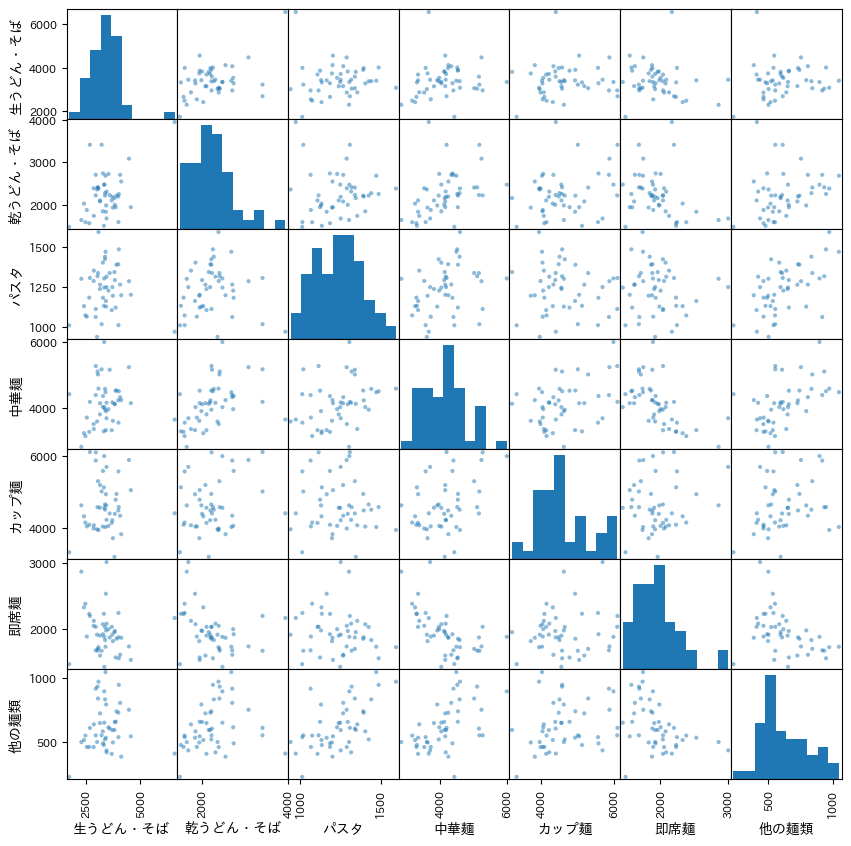

In [7]:
from pandas import plotting 
plotting.scatter_matrix(df.iloc[:,1:], figsize=(10, 10), alpha=0.5)
plt.show()

[sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)を用いて主成分分析を実行する。

In [8]:
from sklearn.decomposition import PCA

pca = PCA()
P = pca.fit_transform(X)

7個の主成分ベクトル（PC1からPC7）を表示する。第1主成分ベクトルの係数が概ね正であるので、第1主成分得点は麺類の消費の多さを反映すると考えられる。第2主成分ベクトルの係数は、「うどん・そば」では正、「中華麺」や「カップ麺」では負であるので、うどん・そばの消費の多さを反映すると考えられる。

In [9]:
pd.DataFrame(pca.components_, columns=F, index=[f'PC{i+1}' for i in range(pca.n_components_)])

,生うどん・そば,乾うどん・そば,パスタ,中華麺,カップ麺,即席麺,他の麺類
PC1,0.504964,0.408879,0.016869,0.547186,0.503093,-0.132920,0.085808
PC2,0.756743,0.150538,-0.006417,-0.292168,-0.562357,-0.025577,-0.048744
PC3,-0.257699,0.122030,0.078280,0.609924,-0.622765,-0.379370,0.093849
PC4,-0.324610,0.890367,-0.069258,-0.286218,-0.048700,0.098778,-0.055040
PC5,0.021384,0.023882,0.203051,0.355162,-0.184924,0.889120,-0.082890
PC6,0.005351,-0.035921,-0.613812,0.179672,-0.021918,-0.006870,-0.767533
PC7,-0.009304,0.025523,0.755483,-0.053613,0.075947,-0.193436,-0.618423


主成分分析により、各データ点を第1から第7主成分に射影したときの主成分得点を表形式で表示する。

In [10]:
pd.options.display.float_format = '{:.4f}'.format
pd.DataFrame(P, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=C)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
北海道,153.4222,-534.3034,-152.1148,-141.8253,-420.6236,-98.0002,65.1171
青森県,1101.6032,-1496.8960,-152.2914,-252.7109,175.4282,299.5492,-12.7754
岩手県,1793.4762,-1334.3605,386.5550,-402.2430,341.3197,43.9761,-95.7998
宮城県,763.3783,-877.5282,352.0041,-76.2460,-33.1394,-91.6132,0.0315
秋田県,1172.0693,-473.2078,661.3547,767.5094,34.5863,324.9647,-63.6768
山形県,2150.6186,-95.0627,-182.2755,-10.1633,12.6520,16.8480,45.4275
福島県,783.0933,-1051.2636,-321.7877,385.6438,-435.1023,-116.8548,-166.2046
茨城県,47.2661,64.7670,221.2223,200.7490,-480.9328,-50.3860,96.3663
栃木県,642.1218,68.3046,-26.7517,-345.0909,26.5946,-115.6424,58.6243
群馬県,728.3322,594.9992,-438.8713,-701.5308,-423.2849,94.8302,114.2694


用いる主成分の数$k$を横軸、累積寄与率を縦軸としてグラフを描画する。第2主成分までで元データの分散の約70%、第3主成分までで元データの分散の約90%を説明できることが分かる。

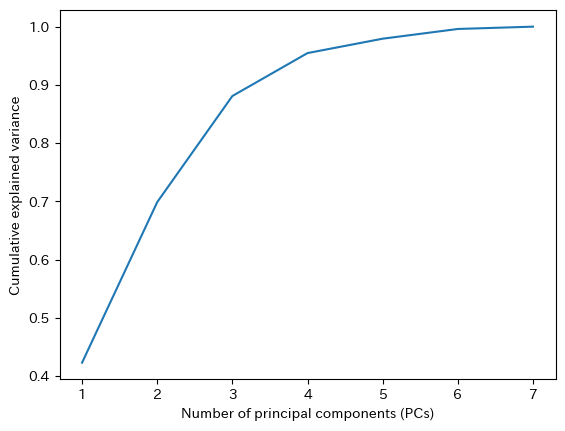

In [11]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)

ax.plot(np.arange(1, pca.n_components_+1), np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of principal components (PCs)')
ax.set_ylabel('Cumulative explained variance')
fig.show()

第1主成分得点を横軸、第2主成分得点を縦軸として、各都道府県庁所在地の麺類の支出金額を2次元平面上にプロットしてみる。これだけでも、地理的に近い都道府県庁所在地が近くにプロットされるのが興味深い。第1主成分得点が最も高いのは山形市（山形県）であり、周辺に他の都道府県庁所在地がプロットされていないことから、麺類の支出金額が特徴的であることが分かる。ただ、他の都道府県を全く寄せ付けない圧倒的な存在感を示すのは、第1主成分得点と第2主成分得点のいずれも高い高松市（香川県）である。

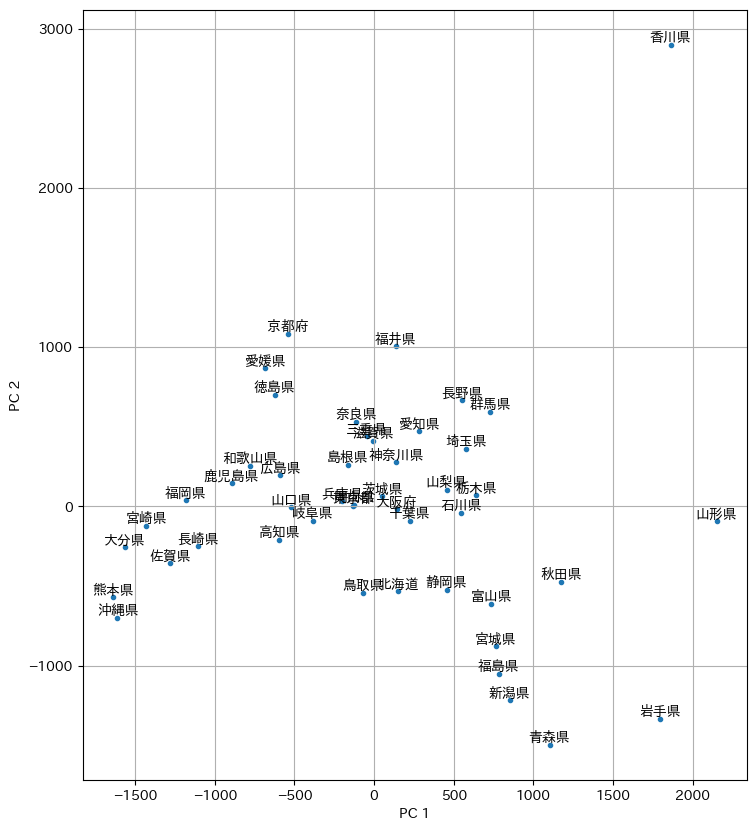

In [12]:
fig = plt.figure(dpi=100, figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
m = ax.scatter(P[:, 0], P[:, 1], marker='.')
for i, label in enumerate(C):
    ax.text(P[i][0], P[i][1], label, ha='center', va='bottom')
ax.set_aspect('equal')
ax.grid()
fig.show()

各都道府県庁所在地がどの品目に支出するのかを表すため、各品目を2,000円消費したときの点を原点からの矢印で表示した。高松市（香川県）は「生うどん・そば」に対する支出が特徴的であること、青森市（青森県）はカップ麺に対する支出が特徴的であること、山形市（山形県）は麺類全般に対して支出していることが示唆される。

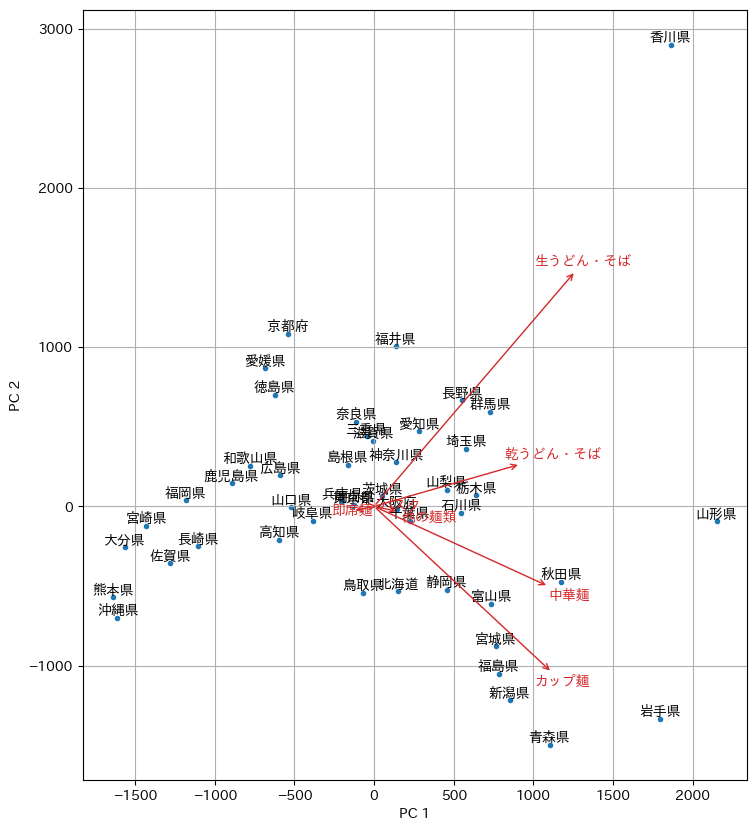

In [13]:
fig = plt.figure(dpi=100, figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_aspect('equal')

m = ax.scatter(P[:, 0], P[:, 1], marker='.')
for i, label in enumerate(C):
    ax.text(P[i][0], P[i][1], label, ha='center', va='bottom')

for i, label in enumerate(F):
    ax.annotate(
        label, xy=(0, 0), xytext=pca.components_[:2,i] * 2000,
        color="tab:red", arrowprops=dict(arrowstyle='<-', color="tab:red")
    )
ax.grid()
fig.show()

## 応用例 (2): 手書き文字

scikit-learnの[sklearn.datasets.load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)を使い、手書き文字認識のデータセットを読み込む。

In [14]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

読み込まれたデータは$1797$事例からなり、各事例は$64$（$8 \times 8$ピクセル）次元。

In [15]:
X.shape

(1797, 64)

In [16]:
y.shape

(1797,)

データ中の先頭の事例の画像をプロットする。

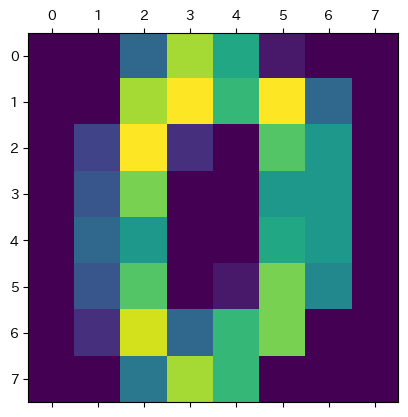

In [17]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)
ax.matshow(X[0].reshape(8, -1)) 
fig.show() 

入力データは$64$次元の特徴空間で表現されていたが、主成分分析を用いて特徴空間を$2$次元に圧縮する。

In [18]:
from sklearn.decomposition import PCA

pca = PCA(2)
P = pca.fit_transform(X)

各事例の特徴空間の次元が$2$次元になった。

In [19]:
P.shape

(1797, 2)

先ほどの画像の特徴ベクトルを$2$次元に圧縮したものを表示する。

In [20]:
P[0]

array([-1.25946548, 21.27488462])

各事例の特徴ベクトルが$2$次元に圧縮されたので、それらを$2$次元平面上にプロットする。そのとき、画像の数字の正解で色分けを行うと、同じ数字の画像が近くにまとまっていることが確認できる。

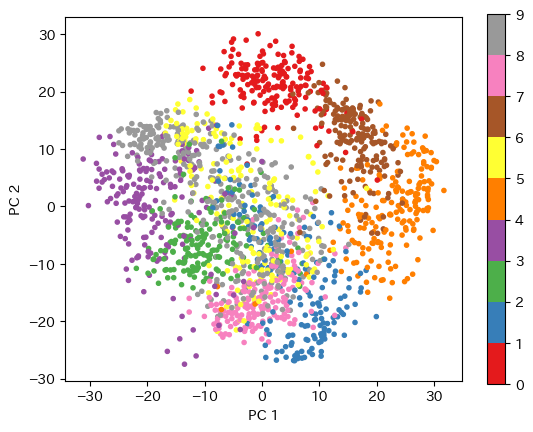

In [21]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_aspect('equal')
m = ax.scatter(P[:, 0], P[:, 1], c=y, marker='.', cmap='Set1')
fig.colorbar(m)
fig.show()

第１主成分ベクトルと第２主成分ベクトルを２次元画像として可視化する。入力画像とこれらの主成分ベクトルとの内積で主成分得点（射影後の値）が計算される。

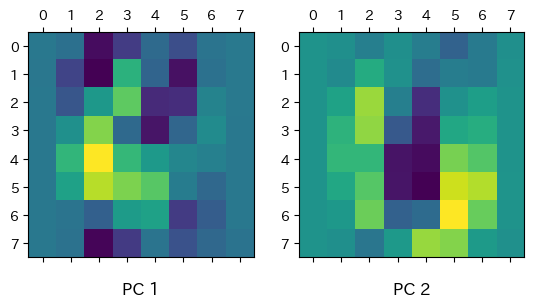

In [22]:
fig, axes = plt.subplots(1, 2, dpi=100)
for i, ax in enumerate(axes.flat):
    ax.matshow(pca.components_[i].reshape(8, -8))
    ax.set_title(f'PC {i+1}', y=-0.2)

横軸を主成分の数、縦軸を累積寄与率としてグラフを書いてみると、おおよそ10数個の主成分ベクトルでデータ全体の分散の80%以上をカバーできることが分かる。

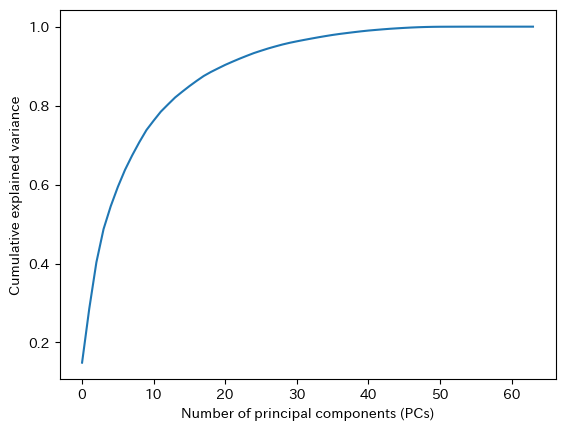

In [23]:
pca = PCA()
pca.fit(X)

fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)

ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of principal components (PCs)')
ax.set_ylabel('Cumulative explained variance')
fig.show()

## 応用例 (3): 固有顔

[固有顔](https://ja.wikipedia.org/wiki/%E5%9B%BA%E6%9C%89%E9%A1%94)（Eigenface）と呼ばれる手法を体験してみよう。固有顔は顔画像のデータに対して主成分分析を行い、主成分ベクトルを求めたもので、顔認識の特徴量抽出（の次元圧縮）に用いられる。今回は、[sklearn.datasets.fetch_lfw_people](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_lfw_people.html)を用いて、顔画像のデータを読み込む。

In [24]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

読み込まれたデータは$1348$件で、それぞれ、縦が$62$ピクセル、横が$47$ピクセルの画像になっている。

In [25]:
faces.images.shape

(1348, 62, 47)

読み込まれた画像を、その人物名と一緒に表示する。

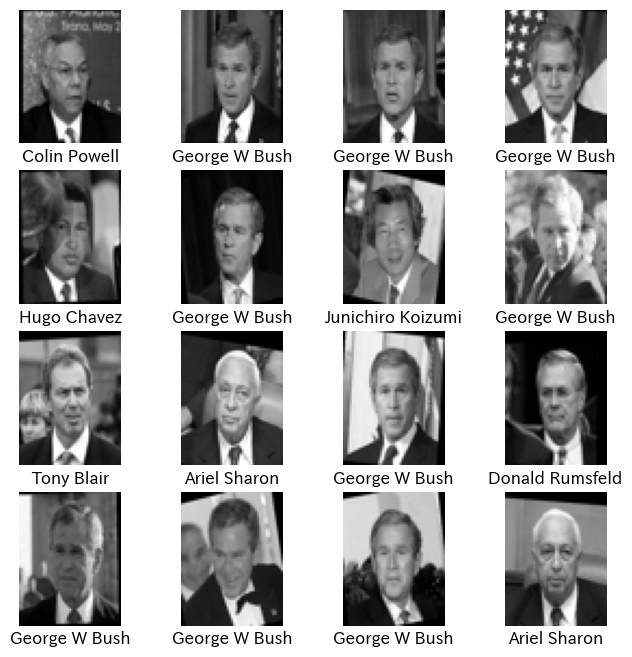

In [26]:
fig, axes = plt.subplots(4, 4, dpi=100, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i], cmap='binary_r')
    ax.set_title(faces.target_names[faces.target[i]], y=-0.2)
    ax.set_axis_off()

顔画像データに主成分分析をかけて、150個の主成分ベクトルを求める。

In [27]:
from sklearn.decomposition import PCA

pca = PCA(150)
pca.fit(faces.data)

PCA(n_components=150)

[sklearn.decomposition.PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)は、主成分分析を行う前に、データの事例ベクトルの平均を自動的に取り除く。その平均を２次元で可視化することで、先ほどのデータセットの顔画像の「平均」を見ることができる（彫りが深い…）。

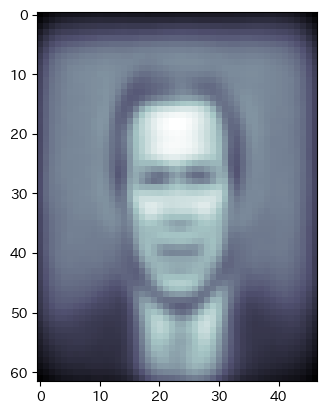

In [28]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)
ax.imshow(pca.mean_.reshape(faces.images[0].shape), cmap='bone')
fig.show()

第1主成分から順に、第16主成分まで可視化してみる。

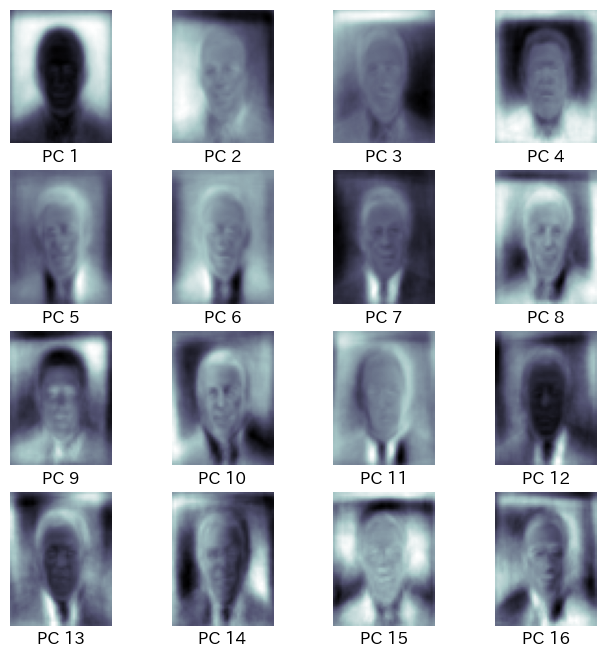

In [29]:
fig, axes = plt.subplots(4, 4, dpi=100, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')
    ax.set_title(f'PC {i+1}', y=-0.2)
    ax.set_axis_off()

横軸を主成分の数、縦軸を累積寄与率としてグラフを書いてみると、だいたい30個弱の主成分ベクトルでデータ全体の分散の80%以上をカバーできることが分かる。

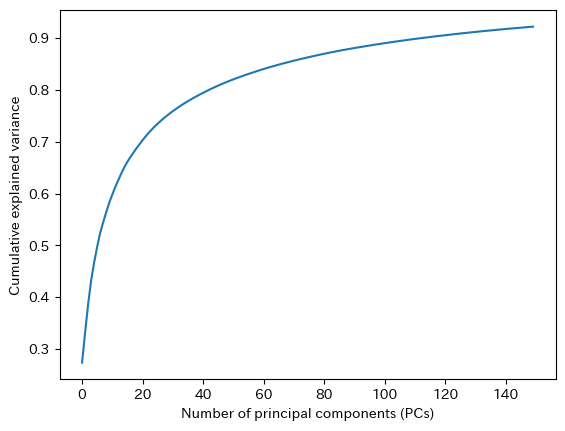

In [30]:
fig = plt.figure(dpi=100)
ax = fig.add_subplot(1,1,1)

ax.plot(np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of principal components (PCs)')
ax.set_ylabel('Cumulative explained variance')
fig.show()

画像データを$150$次元の空間に射影してから、元の画像の空間に戻してみると、元画像を少ない情報量に圧縮した画像を得ることができる。以下の可視化では、上段が元画像、下段が圧縮後の画像である。

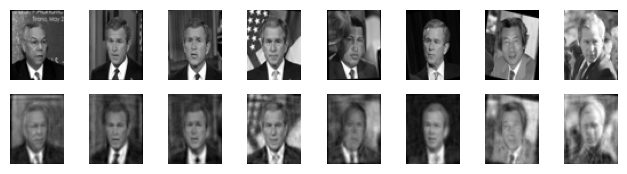

In [31]:
P = pca.transform(faces.data)
PB = pca.inverse_transform(P)

fig, axes = plt.subplots(2, 8, dpi=100, figsize=(8, 2))
for i in range(8):
    axes[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    axes[0, i].set_axis_off()
    axes[1, i].imshow(PB[i].reshape(62, 47), cmap='binary_r')
    axes[1, i].set_axis_off()

---

[機械学習帳](https://chokkan.github.io/mlnote/) © Copyright 2020-2022 by [岡崎 直観 (Naoaki Okazaki)](https://www.chokkan.org/). この作品は<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">クリエイティブ・コモンズ 表示 - 非営利 - 改変禁止 4.0 国際 ライセンス</a>の下に提供されています。 <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="クリエイティブ・コモンズ・ライセンス" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/80x15.png" /></a>　ただし、作品中のコードセル部分は<a rel="license" href="https://opensource.org/licenses/MIT">MITライセンス</a>の下に提供されています。